In [1]:
# Loading the necessary libraries
library(tidyverse)
library(broom)
library(stats)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
options(warn = -1)

In [3]:
data <- read_csv("train_data.csv")

Rows: 318438 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): Hospital_type_code, Hospital_region_code, Department, Ward_Type, Wa...
dbl (9): case_id, Hospital_code, City_Code_Hospital, Available Extra Rooms i...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
head(data)

case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>
1,8,c,3,Z,3,radiotherapy,R,F,2,31397,7,Emergency,Extreme,2,51-60,4911,0-10
2,2,c,5,Z,2,radiotherapy,S,F,2,31397,7,Trauma,Extreme,2,51-60,5954,41-50
3,10,e,1,X,2,anesthesia,S,E,2,31397,7,Trauma,Extreme,2,51-60,4745,31-40
4,26,b,2,Y,2,radiotherapy,R,D,2,31397,7,Trauma,Extreme,2,51-60,7272,41-50
5,26,b,2,Y,2,radiotherapy,S,D,2,31397,7,Trauma,Extreme,2,51-60,5558,41-50
6,23,a,6,X,2,anesthesia,S,F,2,31397,7,Trauma,Extreme,2,51-60,4449,11-20


In [36]:
shape <- dim(data)
print(shape)

[1] 318438     18


In [5]:
names(data)

[1] "case_id"                           "Hospital_code"                    
 [3] "Hospital_type_code"                "City_Code_Hospital"               
 [5] "Hospital_region_code"              "Available Extra Rooms in Hospital"
 [7] "Department"                        "Ward_Type"                        
 [9] "Ward_Facility_Code"                "Bed Grade"                        
[11] "patientid"                         "City_Code_Patient"                
[13] "Type of Admission"                 "Severity of Illness"              
[15] "Visitors with Patient"             "Age"                              
[17] "Admission_Deposit"                 "Stay"

In [6]:
# Using rename() function
data <- data %>%
  rename('Type_of_Admission' = 'Type of Admission')

data <- data %>%
  rename('Severity_of_Illness' = 'Severity of Illness')


# EDA

In [38]:
# Checking for missing values
sum(is.na(data$Age))
sum(is.na(data$Admission_Deposit))

# Checking for infinite values
sum(!is.finite(data$Age))
sum(!is.finite(data$Admission_Deposit))

[1] 0

[1] 0

[1] 318438

[1] 0

This !isfinite funtion for age is giving the count of number of rows because Age is not an numeric but a character that consists of a range of ages like 51-60.

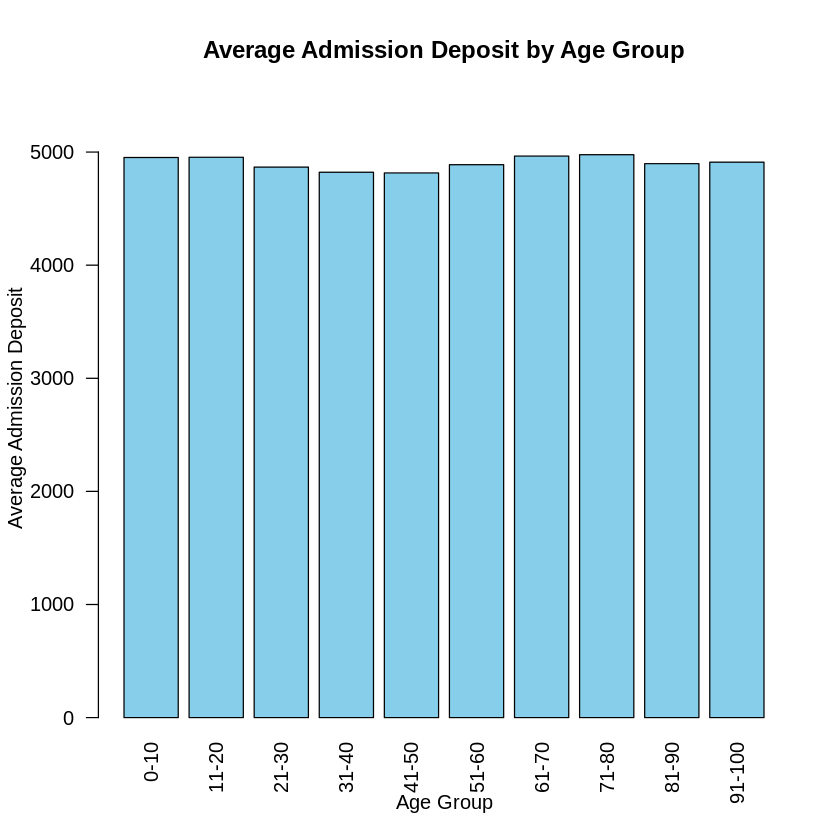

In [41]:
average_deposit <- tapply(data$Admission_Deposit, data$Age, mean)

barplot(average_deposit, xlab = "Age Group", ylab = "Average Admission Deposit",
        main = "Average Admission Deposit by Age Group",
        col = "skyblue", ylim = c(0, max(average_deposit) * 1.1),
        las = 2)

This bar graph shows the comparison between admission deposit amounts among different age groups. There is a little bit of difference between these amounts but it is not very significant.

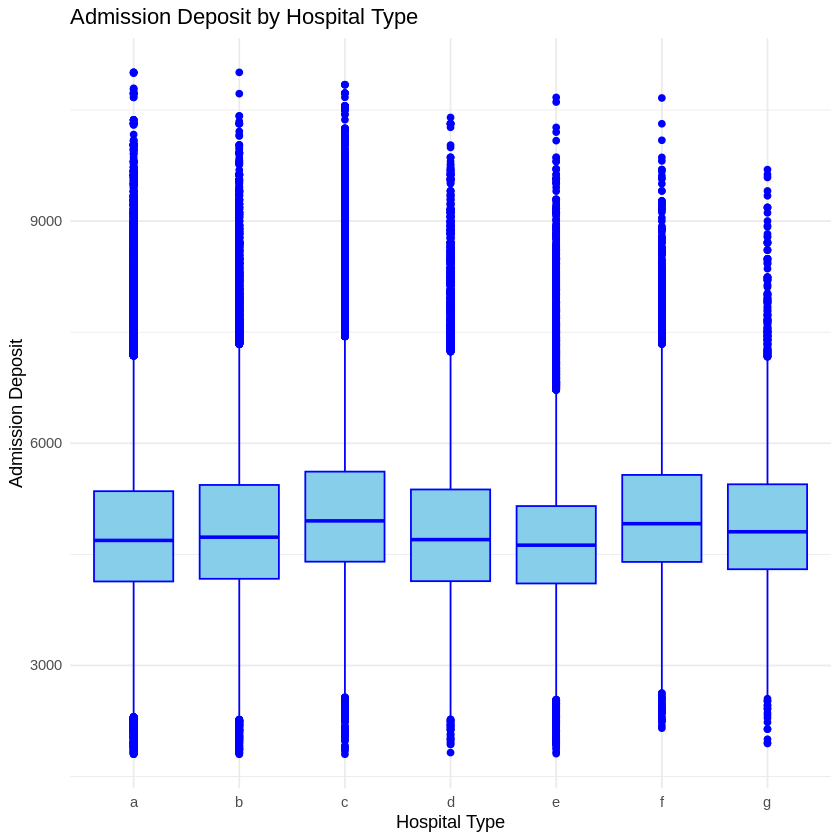

In [42]:
library(ggplot2)

ggplot(data, aes(x = Hospital_type_code, y = Admission_Deposit)) +
  geom_boxplot(fill = "skyblue", color = "blue") +
  labs(x = "Hospital Type", y = "Admission Deposit",
       title = "Admission Deposit by Hospital Type") +
  theme_minimal()

The above set of box plots represent the difference in admission deposit for different hospital types. We can see the variations among these types of hospital with respect to median and 25th and 75th quartiles as well.

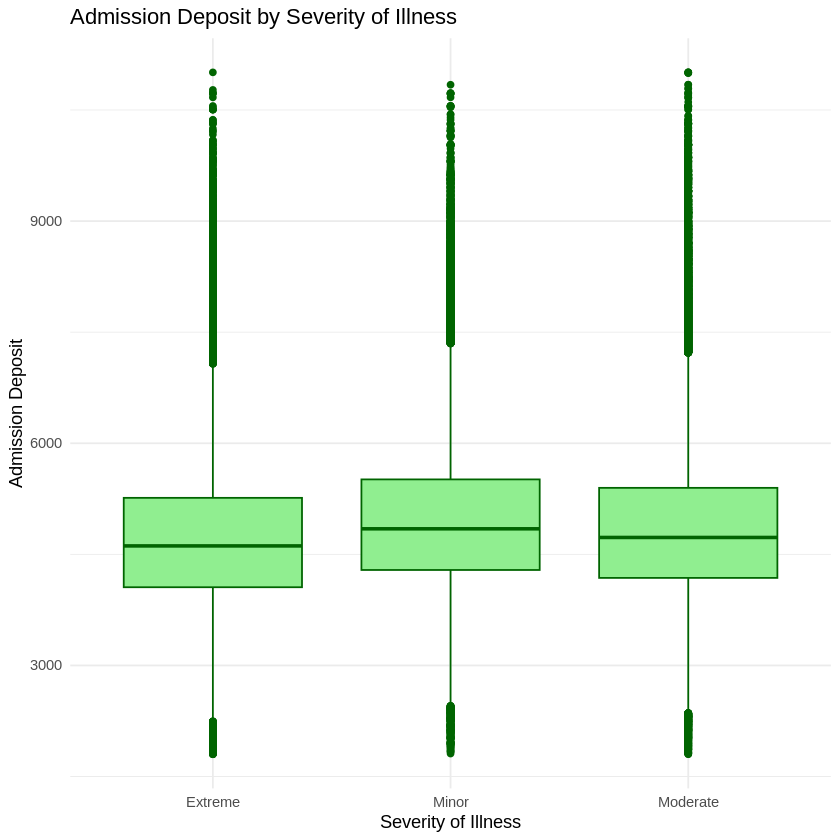

In [43]:
library(ggplot2)

ggplot(data, aes(x = Severity_of_Illness, y = Admission_Deposit)) +
  geom_boxplot(fill = "lightgreen", color = "darkgreen") +
  labs(x = "Severity of Illness", y = "Admission Deposit",
       title = "Admission Deposit by Severity of Illness") +
  theme_minimal()

The above set of box plots represent the difference in admission deposit for different severities of illness. We can see the variations among these severities with respect to median and 25th and 75th quartiles as well.

# Hypothesis Testing -

**Null Hypothesis (H0):** There is no difference in admission deposits between different hospital types.


**Alternative Hypothesis (H1):** There is a significant difference in admission deposits between different hospital types.

In [9]:
class(data$Hospital_type_code)

[1] "character"

In [10]:
hospital_levels <- unique(data$Hospital_type_code)
num_levels <- length(hospital_levels)

print(num_levels)
print(hospital_levels)

[1] 7
[1] "c" "e" "b" "a" "f" "d" "g"


In [50]:
# t_test_result <- t.test(Admission_Deposit ~ Hospital_type_code, data = data)

# I cannot perform t test on hospital type code as t test can only be performed on two sampled data but hospital type code has multiple levels (7).

# ANOVA TEST

In [12]:
# Performing ANOVA test
anova_result <- aov(Admission_Deposit ~ Hospital_type_code, data = data)

print(summary(anova_result))

                       Df    Sum Sq   Mean Sq F value Pr(>F)    
Hospital_type_code      6 3.767e+09 627853543     537 <2e-16 ***
Residuals          318431 3.723e+11   1169275                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Since the p-value (< 0.05) is extremely small, much smaller than the typical significance level of 0.05, I am rejecting the null hypothesis (H0). Therefore, based on the ANOVA results, there is strong evidence to suggest that there is a significant difference in admission deposits between different hospital types.

In [7]:
chi_squared_result <- chisq.test(table(data$Type_of_Admission, data$Severity_of_Illness))

In [8]:
print(chi_squared_result)


	Pearson's Chi-squared test

data:  table(data$Type_of_Admission, data$Severity_of_Illness)
X-squared = 1269.5, df = 4, p-value < 2.2e-16



 The chi-squared test result suggests that the type of admission and severity of illness are not independent; they are significantly associated with each other. This association probably have implications for healthcare planning, resource allocation, and patient care strategies.

---

Null Hypothesis (H0): There is no significant difference in mean admission deposits across different levels of severity of illness.

Alternative Hypothesis (H1): There is a significant difference in mean admission deposits across different levels of severity of illness.

---

In [52]:
# Performing the ANOVA test
anova_result <- aov(Admission_Deposit ~ Severity_of_Illness, data = data)

print(summary(anova_result))

                        Df    Sum Sq   Mean Sq F value Pr(>F)    
Severity_of_Illness      2 1.897e+09 948289787     807 <2e-16 ***
Residuals           318435 3.742e+11   1175134                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Based on the ANOVA results, the p-value is much less than the typical significance level of 0.05 (p < 0.05). So, I am rejecting the null hypothesis. This indicates that there is a significant difference in mean admission deposits across different levels of severity of illness.

# Hypothesis Testing With Randomization

**Null Hypothesis (H0):** There is no difference in admission deposits between different hospital types.


**Alternative Hypothesis (H1):** There is a significant difference in admission deposits between different hospital types.

In [13]:
install.packages("coin")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [14]:
library(coin)

Loading required package: survival



In [15]:
# Converting Hospital_type_code to factor
data$Hospital_type_code <- as.factor(data$Hospital_type_code)

# Performing the randomization test
randomization_result <- oneway_test(Admission_Deposit ~ Hospital_type_code, data = data, distribution = approximate(nresample = 1000))

In [16]:
print(randomization_result)


	Approximative K-Sample Fisher-Pitman Permutation Test

data:  Admission_Deposit by Hospital_type_code (a, b, c, d, e, f, g)
chi-squared = 3189.5, p-value < 0.001



From the above results, we can say that the type of hospital (as categorized by Hospital_type_code) has a statistically significant impact on admission deposit amounts. This analysis matches with the results we got from the anova test above for the same null and alternate hypothesis. We reject the null hypothesis in this case as well.

# Confidence Intervals

In [17]:
# Calculating the confidence interval for Admission_Deposit column
confidence_interval <- t.test(data$Admission_Deposit)$conf.int

cat("Confidence Interval for Admission Deposit (95%): [", confidence_interval[1], ", ", confidence_interval[2], "]\n")

Confidence Interval for Admission Deposit (95%): [ 4876.975 ,  4884.524 ]


In [18]:
confidence_intervals <- list()

# Getting unique hospital types
hospital_types <- unique(data$Hospital_type_code)

# Calculating the confidence interval for each hospital type
for (hospital_type in hospital_types) {
  subset_data <- data[data$Hospital_type_code == hospital_type, ]
  ci <- t.test(subset_data$Admission_Deposit)$conf.int
  confidence_intervals[[hospital_type]] <- ci
}

for (hospital_type in hospital_types) {
  ci <- confidence_intervals[[hospital_type]]
  cat("Confidence Interval for Admission Deposit (95%) for Hospital Type ", hospital_type, ": [", ci[1], ", ", ci[2], "]\n")
}

Confidence Interval for Admission Deposit (95%) for Hospital Type  c : [ 5094.576 ,  5114.907 ]
Confidence Interval for Admission Deposit (95%) for Hospital Type  e : [ 4702.348 ,  4726.942 ]
Confidence Interval for Admission Deposit (95%) for Hospital Type  b : [ 4878.983 ,  4895.662 ]
Confidence Interval for Admission Deposit (95%) for Hospital Type  a : [ 4818.291 ,  4829.349 ]
Confidence Interval for Admission Deposit (95%) for Hospital Type  f : [ 5024.657 ,  5062.913 ]
Confidence Interval for Admission Deposit (95%) for Hospital Type  d : [ 4842.115 ,  4873.298 ]
Confidence Interval for Admission Deposit (95%) for Hospital Type  g : [ 4911.614 ,  4973.165 ]


The confidence intervals above show varying degrees of variability in Admission Deposit amounts across different Hospital Types. Types E, B, and A demonstrate the most consistent deposit amounts while Type G exhibits the greatest variability in the deposit amount.

# Bootstrapping

In [19]:
num_bootstraps <- 100

bootstrap_results <- list()

# Defining a function to calculate the confidence interval from bootstrap samples
calculate_ci <- function(sample_data) {
  ci <- t.test(sample_data$Admission_Deposit)$conf.int
  return(ci)
}

# Bootstrapping for each hospital type
for (hospital_type in hospital_types) {
  subset_data <- data[data$Hospital_type_code == hospital_type, ]
  bootstrap_samples <- lapply(1:num_bootstraps, function(x) sample_n(subset_data, nrow(subset_data), replace = TRUE))
  bootstrap_results[[hospital_type]] <- sapply(bootstrap_samples, calculate_ci)
}

# Calculating the confidence intervals from bootstrap results
confidence_intervals_boot <- lapply(bootstrap_results, function(x) apply(x, 1, mean))

for (hospital_type in hospital_types) {
  ci_boot <- confidence_intervals_boot[[hospital_type]]
  cat("Bootstrap Confidence Interval for Admission Deposit (95%) for Hospital Type ", hospital_type, ": [", ci_boot[1], ", ", ci_boot[2], "]\n")
}


Bootstrap Confidence Interval for Admission Deposit (95%) for Hospital Type  c : [ 5094.528 ,  5114.853 ]
Bootstrap Confidence Interval for Admission Deposit (95%) for Hospital Type  e : [ 4702.349 ,  4726.956 ]
Bootstrap Confidence Interval for Admission Deposit (95%) for Hospital Type  b : [ 4879.006 ,  4895.684 ]
Bootstrap Confidence Interval for Admission Deposit (95%) for Hospital Type  a : [ 4818.459 ,  4829.518 ]
Bootstrap Confidence Interval for Admission Deposit (95%) for Hospital Type  f : [ 5025.28 ,  5063.532 ]
Bootstrap Confidence Interval for Admission Deposit (95%) for Hospital Type  d : [ 4842.905 ,  4874.093 ]
Bootstrap Confidence Interval for Admission Deposit (95%) for Hospital Type  g : [ 4912.66 ,  4974.269 ]


Before bootstrapping, we have the standard Confidence Intervals for Admission Deposit (95%) for each Hospital Type:

- Hospital Type C: [5094.576, 5114.907]
- Hospital Type E: [4702.348, 4726.942]
- Hospital Type B: [4878.983, 4895.662]
- Hospital Type A: [4818.291, 4829.349]
- Hospital Type F: [5024.657, 5062.913]
- Hospital Type D: [4842.115, 4873.298]
- Hospital Type G: [4911.614, 4973.165]

These intervals give us a range within which we are 95% confident that the true mean Admission Deposit for each Hospital Type lies.

After bootstrapping, the Bootstrap Confidence Intervals for Admission Deposit (95%) for each Hospital Type are as follows:

- Hospital Type C: [5094.528, 5114.853]
- Hospital Type E: [4702.349, 4726.956]
- Hospital Type B: [4879.006, 4895.684]
- Hospital Type A: [4818.459, 4829.518]
- Hospital Type F: [5025.280, 5063.532]
- Hospital Type D: [4842.905, 4874.093]
- Hospital Type G: [4912.660, 4974.269]

The Bootstrap Confidence Intervals reflect the variability in the estimates of the mean Admission Deposit after bootstrapping. Comparing these intervals with the standard confidence intervals calculated above, we can observe that some intervals have slightly shifted, indicating potential changes in the estimated mean values with bootstrapping. However, the overall interpretation remains similar, providing a range within which we are 95% confident that the true mean Admission Deposit for each Hospital Type lies, considering the variability introduced by bootstrapping.

Due to the restrictions of my laptop configuration, I had to limit the number of bootstrap samples I used. The results might vary a little bit more as we increase the number of bootstrap samples.

# Regression Modeling

In [54]:
library(stats)

# Building the multiple linear regression model
model <- lm(Admission_Deposit ~ Hospital_type_code + City_Code_Hospital + Age + Severity_of_Illness, data = data)

summary(model)


Call:
lm(formula = Admission_Deposit ~ Hospital_type_code + City_Code_Hospital + 
    Age + Severity_of_Illness, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3259.5  -682.7  -137.9   515.0  6257.8 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 4832.5316    14.9690 322.835  < 2e-16 ***
Hospital_type_codeb           46.6763     5.0329   9.274  < 2e-16 ***
Hospital_type_codec          251.2116     5.8788  42.732  < 2e-16 ***
Hospital_type_coded           88.2893     8.2609  10.688  < 2e-16 ***
Hospital_type_codee         -197.4160     8.0113 -24.642  < 2e-16 ***
Hospital_type_codef          295.6482    11.1331  26.556  < 2e-16 ***
Hospital_type_codeg          201.9200    16.9222  11.932  < 2e-16 ***
City_Code_Hospital           -20.2047     0.7317 -27.614  < 2e-16 ***
Age11-20                      -8.5249    15.9394  -0.535 0.592765    
Age21-30                     -81.7533    14.6054  -5.597 2.18e-0

The linear regression analysis identifies key predictors impacting admission deposit amounts, including hospital type, city code, severity of illness and age categories. While the model exhibits moderate predictive ability, it explains only a small portion of the variance, suggesting additional factors influence deposit amounts. Overall, the model's significance underscores the importance of these predictors in understanding deposit variations. Kindly check the report for detailed analysis of the results.

# Generalized Linear Modeling

In [20]:
library(multcomp)

data$Hospital_type_code <- as.factor(data$Hospital_type_code)

# Creating a linear model
lm_model <- lm(Admission_Deposit ~ Hospital_type_code, data = data)

# Performing generalized linear hypothesis test (GLHT) for confidence intervals
ci <- glht(lm_model, linfct = mcp(Hospital_type_code = "Tukey"))

summary_ci <- summary(ci)

print(summary_ci)

Loading required package: mvtnorm

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser





	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = Admission_Deposit ~ Hospital_type_code, data = data)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)    
b - a == 0   63.502      5.011  12.672  < 0.001 ***
c - a == 0  280.921      5.798  48.455  < 0.001 ***
d - a == 0   33.887      8.093   4.187  < 0.001 ***
e - a == 0 -109.175      7.440 -14.674  < 0.001 ***
f - a == 0  219.965     10.835  20.301  < 0.001 ***
g - a == 0  118.569     16.779   7.066  < 0.001 ***
c - b == 0  217.419      6.513  33.383  < 0.001 ***
d - b == 0  -29.616      8.620  -3.436  0.00897 ** 
e - b == 0 -172.678      8.010 -21.557  < 0.001 ***
f - b == 0  156.462     11.234  13.927  < 0.001 ***
g - b == 0   55.067     17.040   3.232  0.01745 *  
d - c == 0 -247.035      9.100 -27.147  < 0.001 ***
e - c == 0 -390.096      8.524 -45.763  < 0.001 ***
f - c == 0  -60.956     11.606  -5.252  < 0.001 ***
g - c == 0 -162.352     17.

The above generalized linear modeling test shows significant differences in admission deposit means across Hospital_type_code levels, with notable variations between specific pairs (e.g., b vs. a, c vs. a). These findings show us the role of hospital type in deposit variations.

# Diagnostics of the Model - Goodness of Fit, Feature Selection, Residuals

I am performing detailed diagnostics of the generalized linear regression model implemented above.

In [25]:
summary(lm_model)$r.squared

[1] 0.01001626

In [35]:
summary(lm_model)$adj.r.squared

[1] 0.009997611

The adjusted R-squared values (0.0100 and 0.0100) indicate the regression model's limited ability to explain variance in Admission_Deposit with the current variables. This suggests a need for alternative modeling methods or additional features to enhance explanatory power. This insight is crucial for refining future analyses and improving predictive accuracy.

In [26]:
summary(lm_model)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4823.82009,2.855261,1689.449715,0.000000e+00
Hospital_type_codeb,63.50245,5.011167,12.672187,8.607594e-37
Hospital_type_codec,280.92137,5.797532,48.455337,0.000000e+00
Hospital_type_coded,33.88676,8.093258,4.187035,2.826975e-05
Hospital_type_codee,-109.17512,7.440282,-14.673520,9.883476e-49
Hospital_type_codef,219.96492,10.835123,20.301101,1.437502e-91
Hospital_type_codeg,118.56943,16.779128,7.066483,1.592329e-12


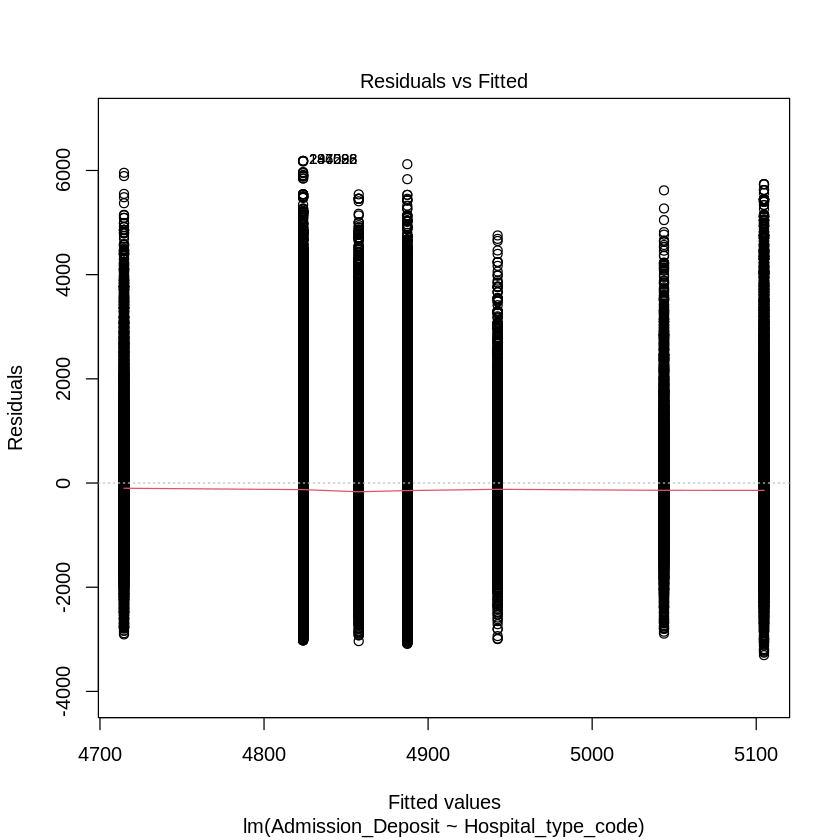

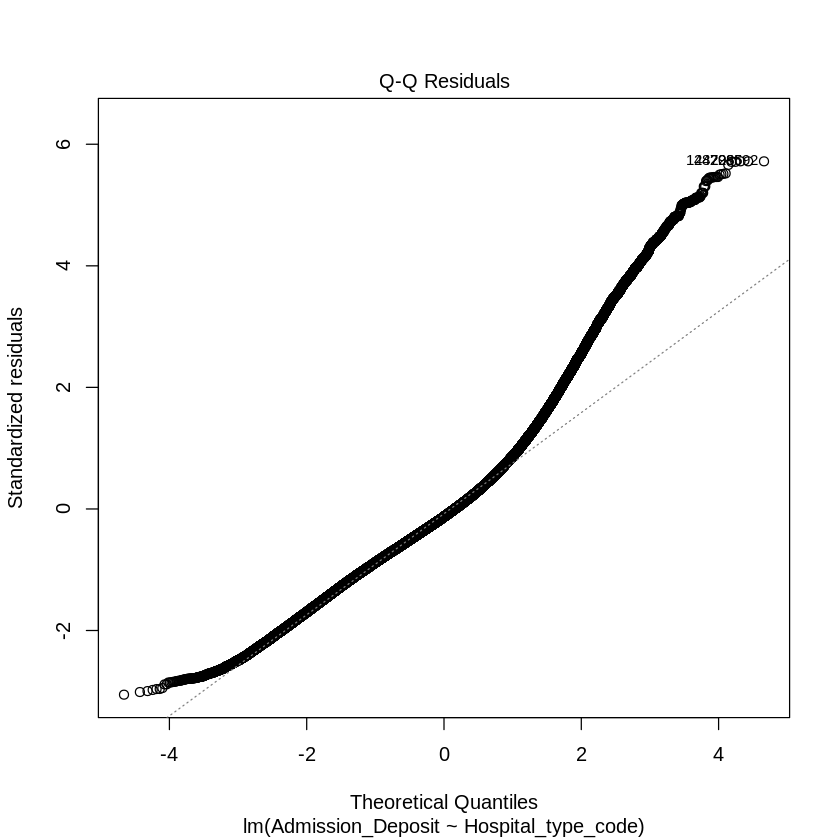

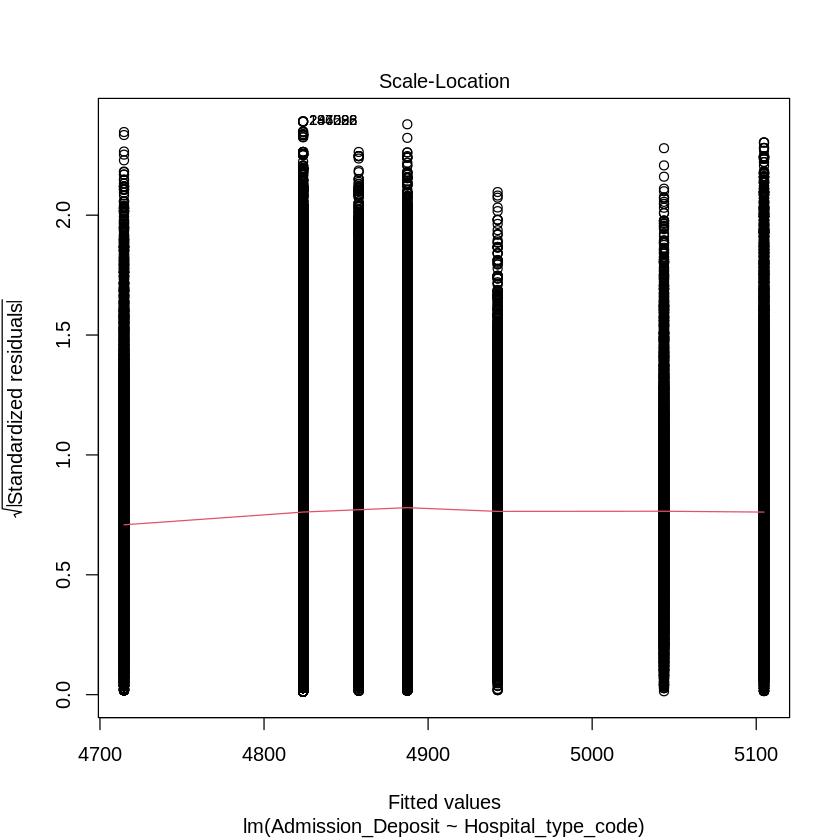

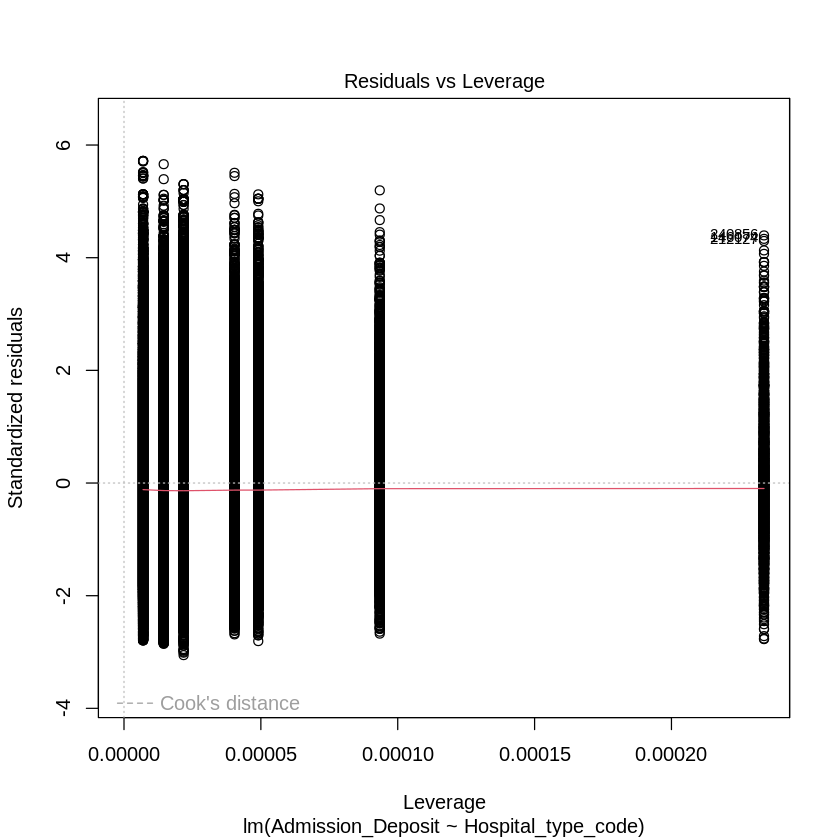

In [56]:
# For generalized simple linear regression modelling

plot(lm_model)

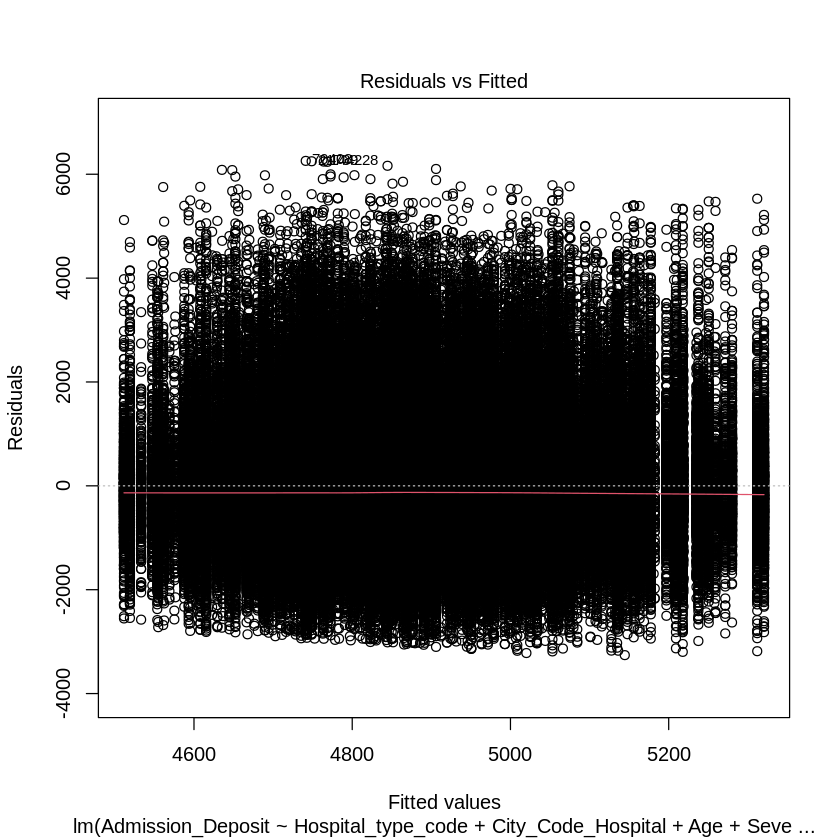

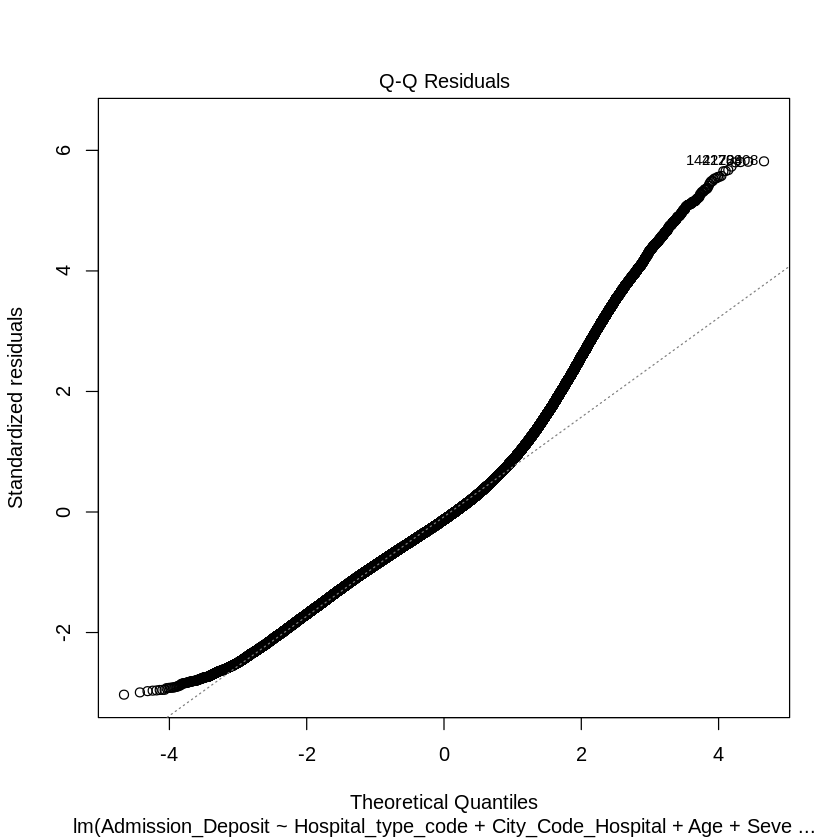

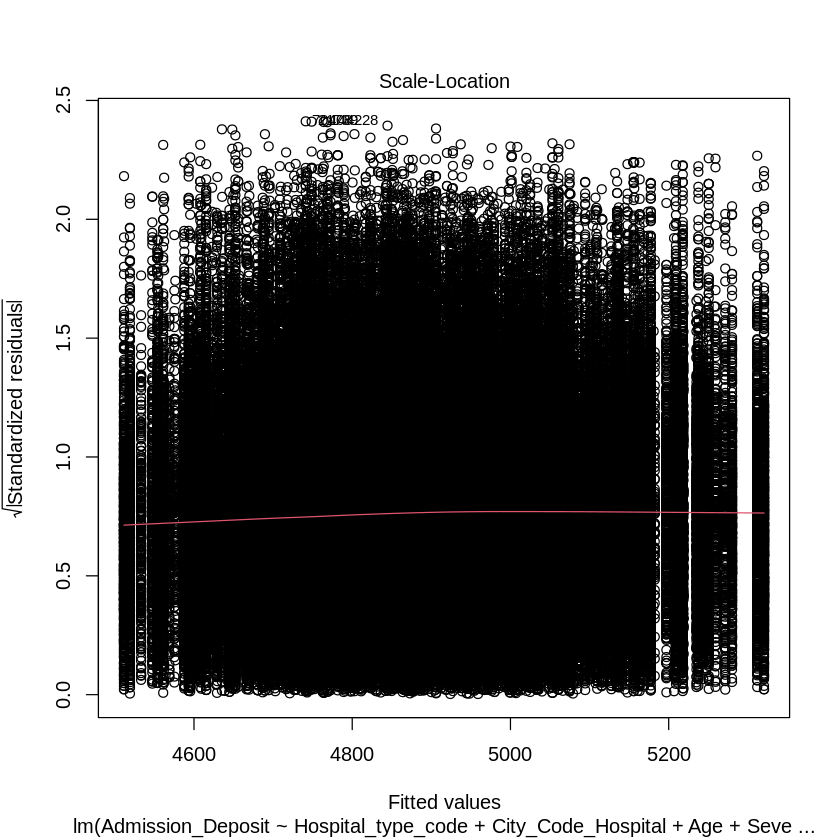

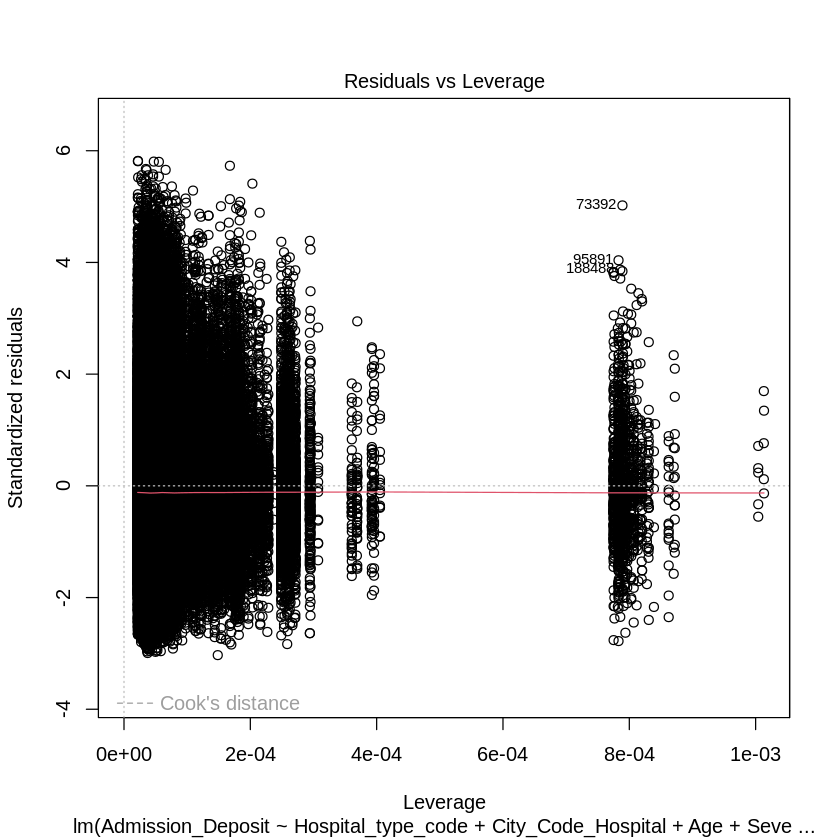

In [57]:
# for multiple linear regresssion model

plot(model)

In [29]:
install.packages("gvlma")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [30]:
library(gvlma)
gvlma(lm_model)


Call:
lm(formula = Admission_Deposit ~ Hospital_type_code, data = data)

Coefficients:
        (Intercept)  Hospital_type_codeb  Hospital_type_codec  
            4823.82                63.50               280.92  
Hospital_type_coded  Hospital_type_codee  Hospital_type_codef  
              33.89              -109.18               219.96  
Hospital_type_codeg  
             118.57  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = lm_model) 

                        Value p-value                   Decision
Global Stat         9.273e+04       0 Assumptions NOT satisfied!
Skewness            4.632e+04       0 Assumptions NOT satisfied!
Kurtosis            4.597e+04       0 Assumptions NOT satisfied!
Link Function      -7.329e-14       1    Assumptions acceptable.
Heteroscedasticity  4.377e+02       0 Assumptions NOT satisfied!

In [32]:
n_obs <- nrow(data)
print(n_obs)

[1] 318438


# Report

## 1. Introduction

I conducted a statistical analysis to investigate factors influencing admission deposits in healthcare settings. This statistical analysis goes deep into understanding the intricate factors influencing admission deposits in healthcare settings, crucial for managing healthcare finances and optimizing patient care. Examining variables like hospital type, severity of illness, admission type, and patient demographics, this analysis aims to discover the patterns that contribute to deposit variations. With a backdrop of evolving healthcare landscapes and prior research in healthcare finance and economics, this analysis contributes to evidence-based decision-making in healthcare management, resource allocation, and patient financial assistance programs.

There are some previously performed predictive models on this topic that will help in understanding the admission deposit and length of stay at the hospital better but this project specifically aims at taking a step towards understanding the importance of statistical analysis of the dependent and independent variables to make a better sense of the predictive models implemented.

### Data

The dataset sourced from Kaggle - AV : Healthcare Analytics II contains almost 32,000 observations across 18 variables that are very important for understanding hospital management and patient care. Each variable offers valuable insights into hospital dynamics and patient demographics. For instance, variables like Hospital Type Code, City Code, and Ward Type provide context on hospital infrastructure and location, while Age and Severity of Illness shed light on patient demographics and medical condition severity. The Admission_Deposit variable, being the key focus of this project reflects financial aspects of patient admissions, playing a vital role in healthcare finance management. This dataset helps in comprehensive analyses, such as examining the relationship between hospital characteristics and admission deposits, identifying factors influencing patient stays, and optimizing resource allocation for improved patient outcomes and financial sustainability in healthcare institutions.

### Research Questions I aim to answer in this project:

- Is there a significant difference in admission deposits between different hospital types and severity of illness?
- In other words, how do Hospital Type, City Code, severity of illness and Age influence admission deposits?

## 2. Methods/Results

After understanding the dataset, I performed various statistcal tests and analysis to understand if there is a correlation between the admission deposit made by the patient and other features such as age, city, severity of illness and hospital type. I restricted my analysis to a few variables but I plan to perform a much more detailed analysis utuliing more variables in the future.

### EDA

The plots present in the EDA section at the top of this report show different variations and patterns present in the data especially in the columns Age, severity of illness, hospital types etc. The data is taken from kaggle and it is quite clean as it came. The null values and inconsistencies were practically not present. Outliers were very few as can be seen in the box plots. Please go to the top of this report to the EDA section for the graphs and their analysis.

### Hypothesis Testing
1. **ANOVA Test**: Revealed a significant difference in admission deposits between different hospital types (p-value < 2.2e-16).

    The ANOVA test conducted on the admission deposits across different hospital types yielded a significant result (F(6, 318431) = 537, p < 0.001), indicating a substantial difference in mean deposits among the hospital types. With degrees of freedom for the hospital type code factor at 6, the analysis consisted of seven different hospital categories. The substantial F value coupled with the extremely low p-value suggests a direct rejection of the null hypothesis, highlighting the importance of hospital type in influencing admission deposits. This finding highlights the need for further exploration and consideration of hospital categorizations which is done to an extent in the next sections.


2. **Randomization Test**: Further confirmed the significant difference in admission deposits across hospital types (p-value < 0.001).

    The randomization test I ran compared admission deposit amounts across different types of hospitals. The high chi-squared value of 3189.5 and the p-value less than 0.001 show that there's a significant difference in deposit amounts between these hospital types. This means that the type of hospital, as categorized by Hospital_type_code, does have a huge influence on how much is paid upon admission. In simpler terms, where a patient goes for treatment can impact how much they pay upfront. This also goes hand in hand with the analysis done above.

3. **Chi-Squared Test**: Found a significant association between Type of Admission and Severity of Illness (p-value < 2.2e-16).

    The chi-squared test conducted between "Type of Admission" and "Severity of Illness" showed a significant relationship (X-squared = 1269.5, df = 4, p < 0.001) between both the variables. So I am rejected the null hypothesis of independence. The observed summary above suggested that the type of admission is not independent of the severity of illness. With a small p-value (< 0.001), the result indicates a strong statistical significance, supporting the alternative hypothesis that there is a meaningful link between these categorical variables. This makes sense because, if a patient with severe health issue gets admitted to a hospital, the charges for that person will be usually higher than the person that came in with just a fever.

### Confidence Intervals
I calculated 95% confidence intervals for admission deposits across hospital types in order to figure out the variability in deposit amounts for different types of hospitals.

I was able to infer the following:

- Hospital Type G shows the widest interval, indicating greater variability in these deposits compared to other types. Conversely, Hospital Types E, B, and A exhibit narrower intervals, indicating more precise estimates and less variability in Admission Deposit amounts. Hospital Type F falls in between, with moderate variability. Types D and C also show moderate variability. Overall, Types E, B, and A demonstrate more consistency in Admission Deposit amounts, offering valuable information for healthcare planning and resource allocation.

### Bootstrapping
I used bootstrapping to estimate confidence intervals, providing insights into the stability of mean admission deposits.

- The Bootstrap Confidence Intervals reflect the variability in the estimates of the mean Admission Deposit after bootstrapping. Comparing these intervals with the standard confidence intervals calculated above, we can observe that some intervals have slightly shifted, indicating potential changes in the estimated mean values with bootstrapping. However, the overall interpretation remains similar, providing a range within which we are 95% confident that the true mean Admission Deposit for each Hospital Type lies, considering the variability introduced by bootstrapping.

### Regression Modeling
1. **Multiple Linear Regression**: I investigated the influence of Hospital Type, City Code, Severity of Illness and Age on admission deposits. I found out the significant effects of these variables.

    The multiple linear regression analysis provides valuable insights into the factors influencing admission deposit amounts in healthcare settings. Residuals, representing prediction errors, show variability in the model's accuracy. Coefficients reveal the impact of different predictors: Hospital_type_code coefficients indicate varying deposit changes across hospital types, City_Code_Hospital affects deposits per city code unit, Severity_of_Illness also effects the admission deposit amount significantly and age categories show diverse effects on deposits compared to a reference age group. Significance codes highlight the predictors with significant impacts, such as hospital type, city code, and most age categories. Model fit indicators like residual standard error and R-squared values suggest moderate predictive ability but a low overall explained variance, indicating other unaccounted factors affecting deposit amounts. The F-statistic confirms the model's overall significance, emphasizing the importance of the included predictors in understanding admission deposit variations.

2. **Generalized Linear Modeling (GLM)**: This helped me confirm significant differences in mean admission deposits between various hospital types.

    The Tukey multiple comparisons test revealed significant differences in mean admission deposit values across different levels of the Hospital_type_code variable (a, b, c, d, e, f, g). Each comparison assessed the mean deposit between two hospital types, with significance determined by the p-values. Notably, comparisons like b - a and c - a exhibit highly significant differences (p < 0.001) which indicated distinct deposit patterns between these hospital types. Similarly, comparisons such as d - b and e - f show significant differences (p < 0.01) which highlights varying deposit amounts across different pairs of hospital types. Overall, these findings underscore the importance of hospital type in influencing admission deposit values and support better decision-making in healthcare management based on deposit variations among hospital types.

### Model Diagnostics
Evaluated model goodness of fit and feature importance. Found low adjusted R-squared values, suggesting limited explanatory power of the linear regression model.

- In examining the adjusted R-squared values of the model, which are remarkably low and nearly identical (0.0100 and 0.0100), it is very evident that the regression model struggles to explain the variance in the dependent variable, Admission_Deposit, using the independent variables. This finding suggests limitations in the model's ability to capture the underlying relationships effectively. So, it is necessary to explore alternative modeling approaches or incorporate additional features to enhance the model's explanatory capacity. This is crucial for refining the analysis and improving the accuracy of predictions in future iterations of the study.

- In the linear regression model analyzing Admission_Deposit against Hospital_type_code, the Intercept (4823.82) signifies the estimated deposit when all other variables are zero, although its practical relevance may vary depending on the context. Hospital types b, c, f, and g exhibit increases in the estimated deposit compared to type a, with coefficients ranging from 63.50 to 280.92 units. Conversely, hospital type d shows a smaller but statistically significant increase (33.89 units), while type e demonstrates a decrease (-109.18 units) in estimated deposit relative to type a. Notably, hospital type f stands out with a substantial increase (219.96 units) compared to type a. The significance of each coefficient is reflected in their associated t-values and p-values, with lower p-values indicating stronger statistical significance. These findings shed light on the diverse impacts of different hospital types on admission deposit amounts, offering valuable insights for healthcare management and strategic resource allocation decisions.

- The plots generated from the code provide valuable insights into the performance and assumptions of the linear regression model. Starting with the residual vs. fitted plot, the presence of a pattern resembling random lines parallel to the y-axis suggests that the model may not adequately capture the underlying relationship between the predictors and the response variable. This pattern indicates that the model's residuals are not randomly distributed around zero, violating the assumption of homoscedasticity.

- Moving on to the QQ plot, the snake-like appearance with deviations from the diagonal line indicates potential departures from normality in the residuals. Non-normality can affect the reliability of statistical inferences drawn from the model, highlighting the need for further investigation or transformation of the data to meet the normality assumption.

- Similarly, the scale-location plot and residuals vs. leverage plot show patterns similar to the residual vs. fitted plot, indicating issues with model fit and potential influential data points that may be affecting the regression results. Overall, these plots suggest that the linear regression model requires refinement, such as addressing heteroscedasticity, non-normality, and influential data points, to improve its accuracy and reliability in predicting admission deposits.

- This has significantly improved when multiple variables were included and a more refined multiple linear regression model was implemented. The normality issue still seems to persist but the other plots show a better fit of the model. This also shows that there is a chance of further improvement as we include more variable that can have a possible impact on the admission deposit amounts. Please refer to both the sets of plots (for linear regression model and for multiple linear regression model) above for reference.

## 3. Conclusions

### Key Findings
- To sum it all up, the analysis underscores the substantial influence of Hospital Type, City Code, Severity of illness and Age on admission deposits within healthcare settings. Notably, these variables exhibit significant impacts on mean deposit amounts, indicating considerable variability across different hospital types. However, it's important to note that while the linear regression model highlights these associations, its relatively low explanatory power suggests the presence of other unaccounted factors influencing admission deposits. This implies a need for further exploration and consideration of additional variables or alternative modeling approaches to improve the model's predictive accuracy and capture the full range of factors affecting admission deposit dynamics in healthcare environments.
### Future Research
- Future research of this project should focus on expanding the scope of variables examined in relation to admission deposits within healthcare settings. This includes delving into patient demographics, such as socio-economic status and insurance coverage, as well as exploring the impact of specific medical procedures or treatments on deposit amounts. Additionally, employing non-linear modeling techniques could enhance the predictive accuracy of models, offering a more clear understanding of the complex relationships influencing admission deposits. Longitudinal studies would also be beneficial to track temporal trends in admission deposit patterns over time, providing valuable insights into how these dynamics evolve and fluctuate within healthcare systems.
